In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data
data = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/Assignment1_StreamFlow_Subscription_Data.csv')

In [3]:
# Convert date columns to datetime format
data['Subscription_Start_Date'] = pd.to_datetime(data['Subscription_Start_Date'])
data['Date_of_Churn'] = pd.to_datetime(data['Date_of_Churn'])

In [4]:
# Handle missing values
# Fill missing 'Reason_for_Churn' with 'Unknown'
data['Reason_for_Churn'].fillna('Unknown', inplace=True)
# Drop 'Date_of_Churn' column as it is less relevant for non-churned users
data.drop(columns=['Date_of_Churn'], inplace=True)

In [5]:
# Remove duplicates if any
data.drop_duplicates(inplace=True)

In [6]:
# Display data information and descriptive statistics
data.info()
data.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   User_ID                  1000 non-null   int64         
 1   Age                      1000 non-null   int64         
 2   Gender                   1000 non-null   object        
 3   Location                 1000 non-null   object        
 4   Subscription_Start_Date  1000 non-null   datetime64[ns]
 5   Subscription_Type        1000 non-null   object        
 6   Monthly_Payment          1000 non-null   float64       
 7   Payment_Method           1000 non-null   object        
 8   Monthly_Hours_Watched    1000 non-null   float64       
 9   Favorite_Genre           1000 non-null   object        
 10  Devices_Used             1000 non-null   object        
 11  Average_Session_Length   1000 non-null   float64       
 12  Content_ID               1000 non-n

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Reason_for_Churn
count,1000.000000,1000.000000,1000,1000,1000,1000,1000.000000,1000,1000.000000,1000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000
unique,NaN,NaN,3,5,NaN,3,NaN,3,NaN,5,4,NaN,NaN,NaN,NaN,5
top,NaN,NaN,Other,West,NaN,Standard,NaN,Credit Card,NaN,Drama,Mobile,NaN,NaN,NaN,NaN,Unknown
freq,NaN,NaN,336,216,NaN,530,NaN,613,NaN,212,408,NaN,NaN,NaN,NaN,754
mean,500.500000,44.385000,NaN,NaN,2021-09-18 17:08:01.662466560,NaN,14.580000,NaN,19.071653,NaN,NaN,1.893771,1049.201000,3.030000,0.246000,NaN
min,1.000000,18.000000,NaN,NaN,2019-05-10 01:53:37.659073,NaN,9.990000,NaN,0.041574,NaN,NaN,0.000486,1000.000000,1.000000,0.000000,NaN
25%,250.750000,31.750000,NaN,NaN,2020-05-15 19:53:37.664891136,NaN,9.990000,NaN,5.490739,NaN,NaN,0.548918,1023.000000,2.000000,0.000000,NaN
50%,500.500000,45.000000,NaN,NaN,2021-08-21 01:53:37.662536448,NaN,14.990000,NaN,13.361219,NaN,NaN,1.271808,1048.000000,3.000000,0.000000,NaN
75%,750.250000,57.000000,NaN,NaN,2023-01-09 07:53:37.664328192,NaN,14.990000,NaN,26.471636,NaN,NaN,2.623575,1075.000000,4.000000,0.000000,NaN
max,1000.000000,70.000000,NaN,NaN,2024-05-06 01:53:37.662112,NaN,19.990000,NaN,139.170408,NaN,NaN,11.417557,1099.000000,5.000000,1.000000,NaN


In [7]:
# Exploratory Data Analysis (EDA)

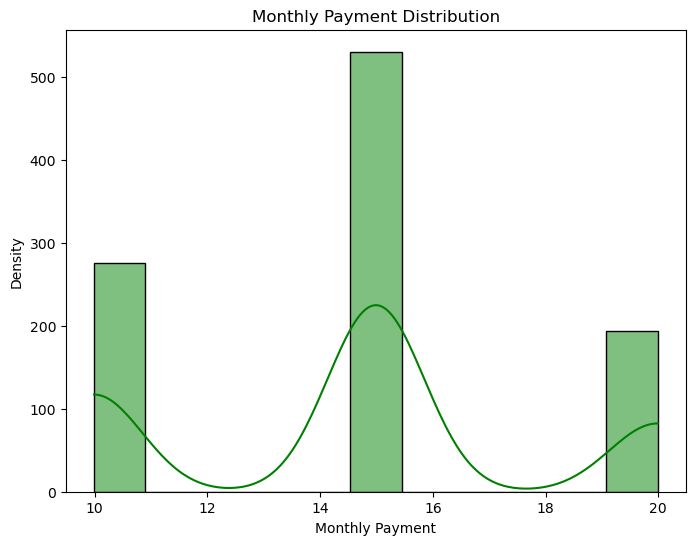

In [8]:
# Histogram for Monthly Payment
plt.figure(figsize=(8, 6))
sns.histplot(data['Monthly_Payment'], kde=True, color='green')
plt.title('Monthly Payment Distribution')
plt.xlabel('Monthly Payment')
plt.ylabel('Density')
plt.show()

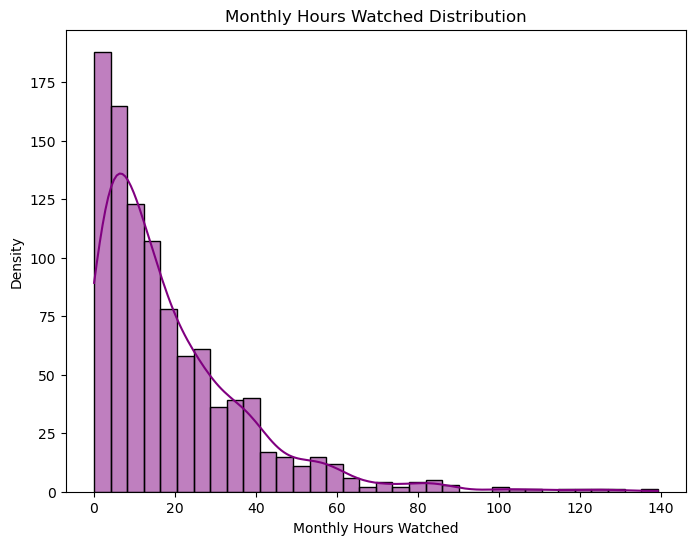

In [9]:
# Histogram for Monthly Hours Watched
plt.figure(figsize=(8, 6))
sns.histplot(data['Monthly_Hours_Watched'], kde=True, color='purple')
plt.title('Monthly Hours Watched Distribution')
plt.xlabel('Monthly Hours Watched')
plt.ylabel('Density')
plt.show()

C:\Users\anbha\AppData\Local\Temp\ipykernel_25788\398573879.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['Subscription_Type'], palette='muted')


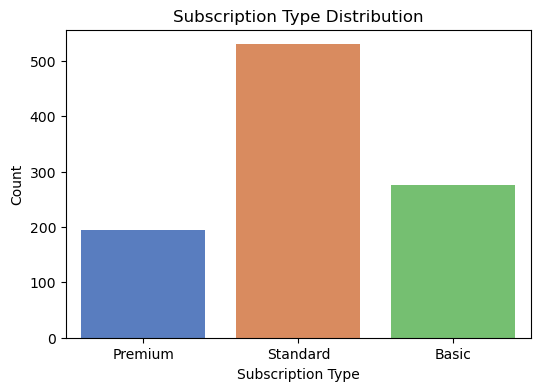

In [10]:
# Bar chart for Subscription Type
plt.figure(figsize=(6, 4))
sns.countplot(x=data['Subscription_Type'], palette='muted')
plt.title('Subscription Type Distribution')
plt.xlabel('Subscription Type')
plt.ylabel('Count')
plt.show()

C:\Users\anbha\AppData\Local\Temp\ipykernel_25788\781334838.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['Gender'], palette='muted')


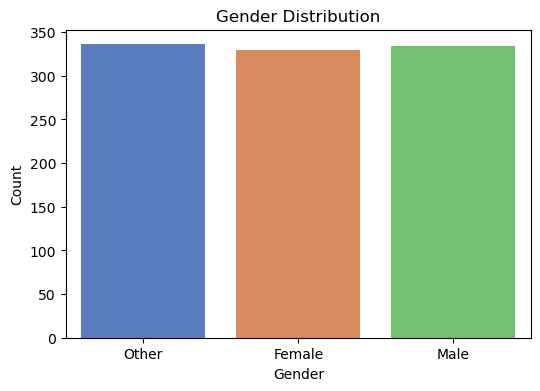

In [11]:
# Bar chart for Gender
plt.figure(figsize=(6, 4))
sns.countplot(x=data['Gender'], palette='muted')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

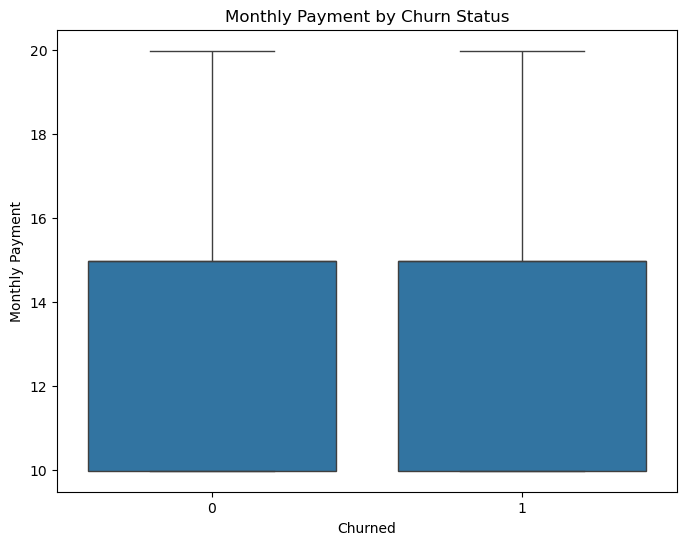

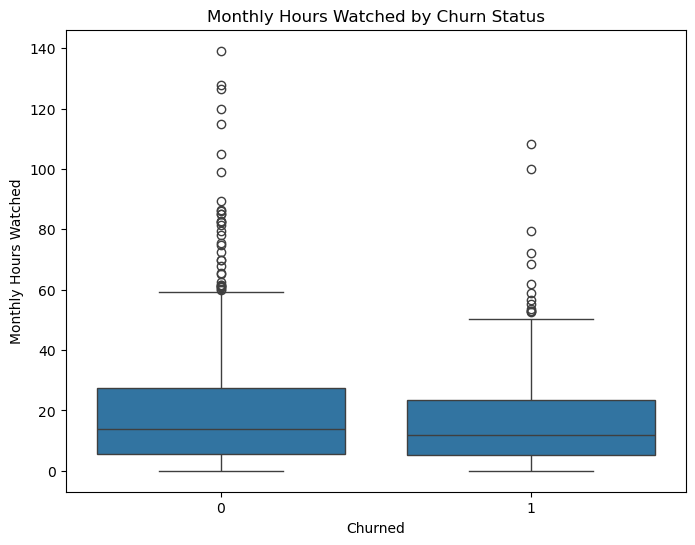

In [12]:
# Box plots for comparing churned vs non-churned
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churned', y='Monthly_Payment', data=data)
plt.title('Monthly Payment by Churn Status')
plt.xlabel('Churned')
plt.ylabel('Monthly Payment')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Churned', y='Monthly_Hours_Watched', data=data)
plt.title('Monthly Hours Watched by Churn Status')
plt.xlabel('Churned')
plt.ylabel('Monthly Hours Watched')
plt.show()

In [13]:
# Hypothesis Testing

In [14]:
# T-test for Monthly Payment
t_test_payment = ttest_ind(data[data['Churned'] == 0]['Monthly_Payment'],
                           data[data['Churned'] == 1]['Monthly_Payment'])
print(f"T-test for Monthly Payment: statistic={t_test_payment.statistic}, p-value={t_test_payment.pvalue}")

T-test for Monthly Payment: statistic=0.4125732870202633, p-value=0.6800078880137712


In [15]:
# T-test for Monthly Hours Watched
t_test_hours = ttest_ind(data[data['Churned'] == 0]['Monthly_Hours_Watched'],
                         data[data['Churned'] == 1]['Monthly_Hours_Watched'])
print(f"T-test for Monthly Hours Watched: statistic={t_test_hours.statistic}, p-value={t_test_hours.pvalue}")


T-test for Monthly Hours Watched: statistic=1.9062754969388838, p-value=0.0569014904129472


In [16]:
# Chi-squared test for Subscription Type and Churn
contingency_table = pd.crosstab(data['Subscription_Type'], data['Churned'])
chi2, p, dof, ex = chi2_contingency(contingency_table)
print(f"Chi-squared test for Subscription Type and Churn: chi2={chi2}, p-value={p}")


Chi-squared test for Subscription Type and Churn: chi2=0.9681720741603008, p-value=0.6162601784049657


In [17]:
# Segmentation Analysis

In [18]:
# Define age groups
def age_group(age):
    if age < 35:
        return 'Young'
    elif age <= 54:
        return 'Middle-aged'
    else:
        return 'Senior'

data['Age_Group'] = data['Age'].apply(age_group)

In [19]:
# Define subscription duration
current_date = pd.Timestamp.now()
data['Subscription_Duration'] = (current_date - data['Subscription_Start_Date']).dt.days

def subscription_duration(days):
    if days < 180:
        return 'Short-term'
    elif days <= 365:
        return 'Medium-term'
    else:
        return 'Long-term'

data['Subscription_Duration_Group'] = data['Subscription_Duration'].apply(subscription_duration)


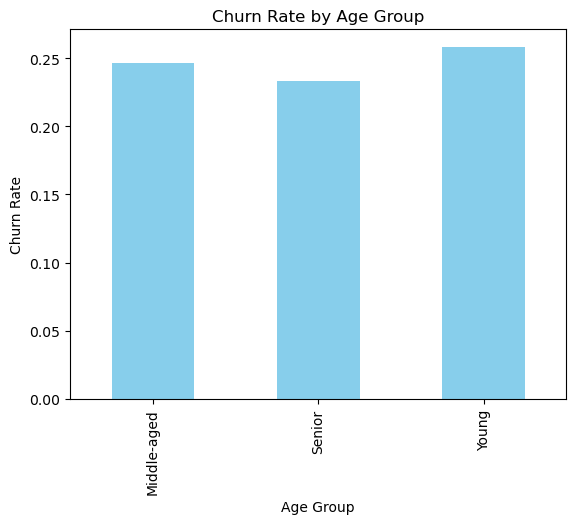

In [20]:
# Analyze churn rate by age group
age_group_churn = data.groupby('Age_Group')['Churned'].mean()
age_group_churn.plot(kind='bar', color='skyblue')
plt.title('Churn Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Churn Rate')
plt.show()

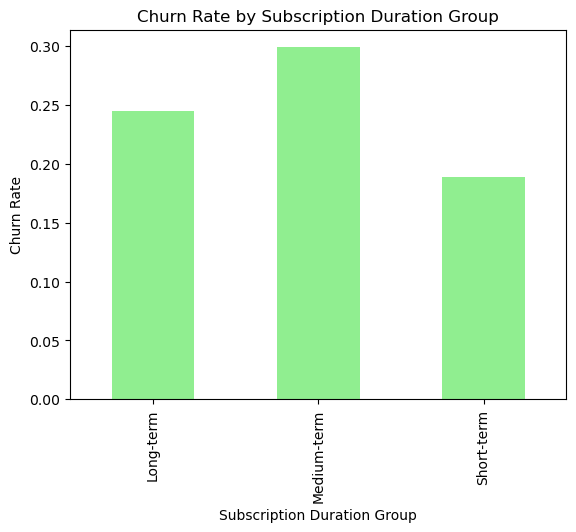

In [21]:
# Analyze churn rate by subscription duration group
duration_group_churn = data.groupby('Subscription_Duration_Group')['Churned'].mean()
duration_group_churn.plot(kind='bar', color='lightgreen')
plt.title('Churn Rate by Subscription Duration Group')
plt.xlabel('Subscription Duration Group')
plt.ylabel('Churn Rate')
plt.show()

In [22]:
# Feature Importance Analysis

In [23]:
# Prepare the data for logistic regression
features = ['Age', 'Monthly_Payment', 'Monthly_Hours_Watched', 'Average_Session_Length']
X = data[features]
y = data['Churned']

In [24]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [26]:
# Fit the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

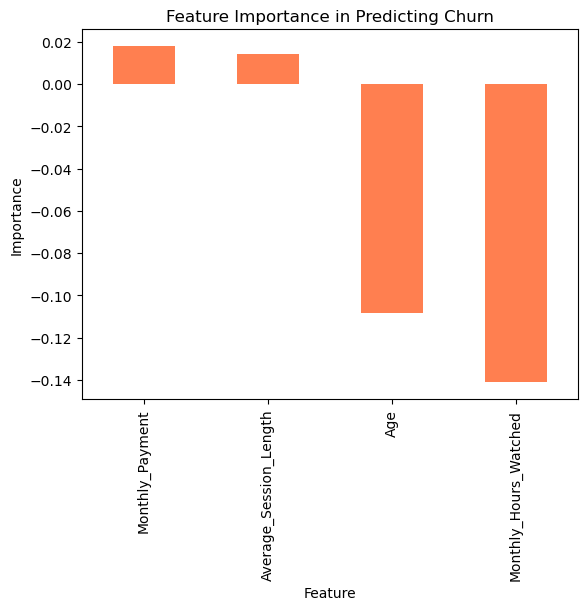

In [27]:
# Get feature importance
feature_importance = pd.Series(log_reg.coef_[0], index=features).sort_values(ascending=False)
feature_importance.plot(kind='bar', color='coral')
plt.title('Feature Importance in Predicting Churn')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()